<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QFT_03_DeepSeek_mkbahk_20250423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 14.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ef86b0ab4838f69f5ef89c474f9b2b01387105f6438ef73866f4e5fd973f2451
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.4 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-jjs5jqey
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
#import matplotlib.pyplot as plt

In [3]:
# 3-qubit quantum circuit 생성
qc = QuantumCircuit(3)

# 초기 상태 |001> 준비 (Qiskit은 q2 q1 q0 순서로 표현)
qc.x(0)  # 첫 번째 큐비트(LSB)를 |1>로 설정하여 |001> 상태 생성
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [4]:
# QFT 서브루틴 정의
def qft_rotations(circuit, n):
    """n-qubit QFT의 회전 게이트 적용"""
    if n == 0:
        return circuit
    ###if

    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    ###for
###def

# QFT 구현 함수
def qft(circuit, n):
    """n-qubit QFT 구현"""
    qft_rotations(circuit, n)
    # 출력 순서를 맞추기 위해 SWAP 게이트 적용
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    ###for

    return circuit
###def

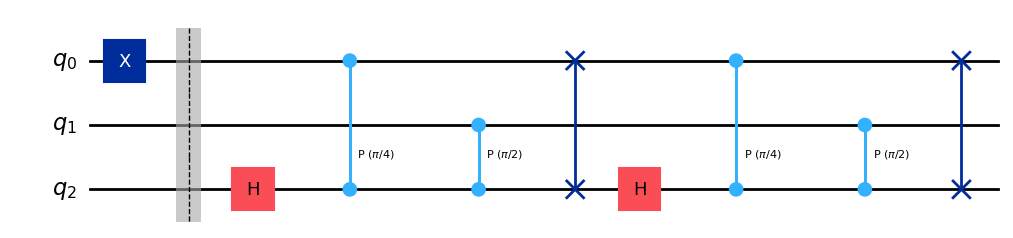

In [8]:
# QFT 적용 (3-qubit)
qft(qc, 3)

# 회로 시각화
qc.draw('mpl')

In [9]:
# 시뮬레이터 설정
simulator = Aer.get_backend('statevector_simulator')

# 회로 실행 및 상태벡터 얻기
result = simulator.run(qc, shots=0).result()
statevector = result.get_statevector()

# 상태벡터 출력
print("Final Statevector:", statevector)


Final Statevector: Statevector([ 5.00000000e-01-6.12323400e-17j,
             -5.00000000e-01+6.12323400e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              3.53553391e-01+3.53553391e-01j,
             -1.38777878e-16-5.00000000e-01j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2))


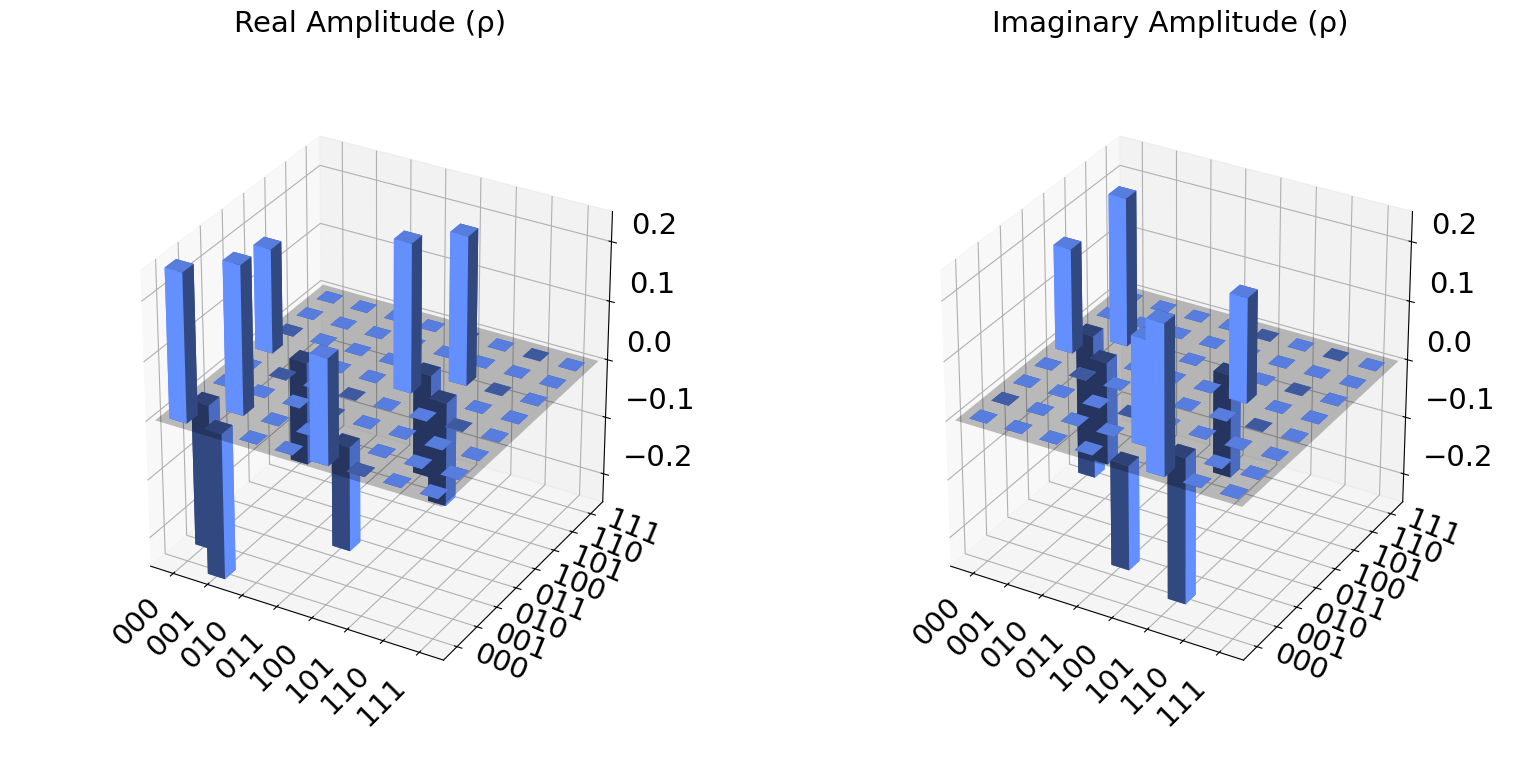

In [10]:
plot_state_city(statevector)

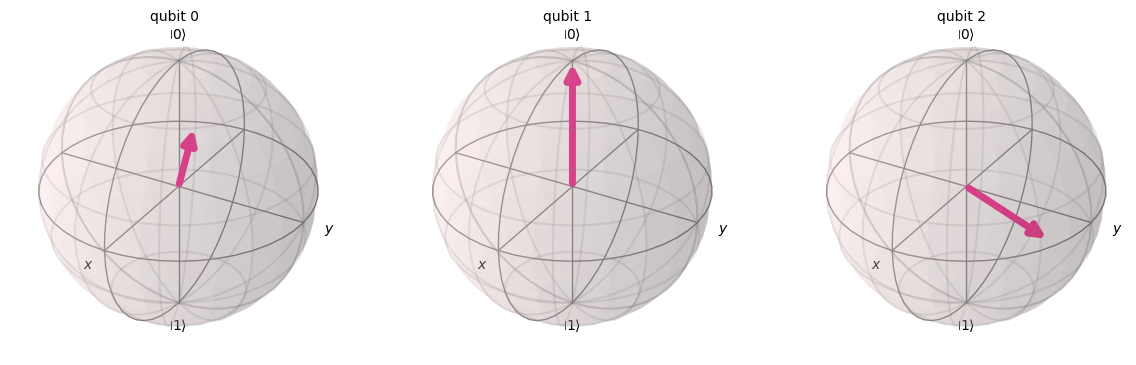

In [11]:
# 각 큐비트의 상태를 블로흐 구체로 시각화
plot_bloch_multivector(statevector)

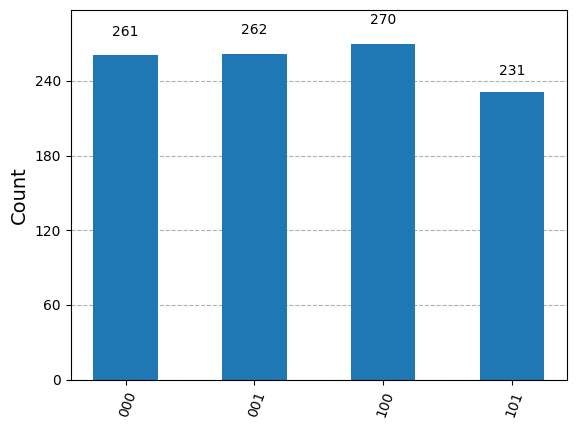

In [12]:
# 측정 확률 분포 시각화
qc.measure_all()  # 측정을 위해 모든 큐비트에 측정 추가
counts = Aer.get_backend('qasm_simulator').run(qc, shots=1024).result().get_counts()
plot_histogram(counts)